# Совместные распределения и оценка параметров

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Совместные распределения

### Дискретный случай

Совместная PMF:

$$
p_{X,Y}(x, y) = \mathbb{P}[X = x, Y=y]
$$

Совместная CDF:
$$
F_{X,Y}(x, y) = \mathbb{P}[X \leqslant x, Y \leqslant y]
$$

#### Частные распределения (marginal distributions)

$$
p_X(x) = \sum_yp_{X,Y}(x, y)
$$

$$
p_Y(y) = \sum_xp_{X,Y}(x, y)
$$

Пример:

| H\G	| g = 1 | g = 2 | g = 3 |
| :-------| :-----------| :---- | :----- |
| **h = 1** | $\frac{1}{16}$ | $\frac{1}{16}$ | $\frac{1}{4}$ |
| **h = 2** | $0$ | $\frac{1}{8}$ | $0$ |
| **h = 3** | $\frac{1}{2}$ |$0$ | $0$ |


#### Зависимость величин

Величины **независимы**, если:

$$
p_{X,Y}(x, y) = \mathbb{P}[X = x]\mathbb{P}[Y = y] = p_X(x)p_Y(y)
$$

(то же самое верно и для CDF).

### Непрерывный случай

Смешанная CDF аналогична:

$$
F_{X,Y}(x, y) = \mathbb{P}[X \leqslant x, Y \leqslant y]
$$

В этом случае удобнее формально определять PDF через CDF:

$$
f_{X,Y}(x, y) = \frac{\partial^2}{\partial x\partial y}F(x,y)
$$

Иными словами:

$$
F_{X,Y}(a, b) = \int_{-\infty}^a \int_{-\infty}^b f_{X,Y}(x,y)dxdy
$$

А исходя из этого, уже можно работать с вероятностью реального события:

$$
\mathbb{P}[a \leqslant X \leqslant b, c \leqslant Y \leqslant d] = \int_c^d \int_b^a f_{X,Y}(x,y)dxdy
$$

#### Частные распределения

$$
f_X(x) = \int_{-\infty}^{+\infty}f(x,y)dy
$$

$$
f_Y(y) = \int_{-\infty}^{+\infty}f(x,y)dx
$$

#### Зависимость

Подобно дискретному случаю, величины независимы, если:

$$
f_{X,Y}(x, y) = f_X(x)f_Y(y)
$$

Это очень важное наблюдение: для независимых событий достаточно умножения. Очень удобно, если наблюдения в датасете независимы, а данные в столбце, как правило, еще и распределены одинаково!

### Условная вероятность в совместных распределениях

Вспоминаем условную вероятность:

$$
\mathbb{P}[X=x|Y=y] = \frac{\mathbb{P}[X=x \cap Y=y]}{\mathbb{P}[Y=y]}
$$

Отсюда:

$$
p_{X|Y}(x|y) = \frac{p_{X,Y}(x,y)}{p_Y(y)}
$$

$$
f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
$$

(также встречается обозначение $\phi(x|y)$)

CDF:

$$
F_{X|Y}(k,y) = \frac{\int_{-\infty}^k f_{X,Y}(x,y)dx}{f_Y(y)}
$$

и отсюда для любого события А:

$$
\mathbb{P}[X \in A | Y=y] = \int_A f_{X|Y}(x|y)dx
$$

**Формула полной вероятности** для совместного распределения, соответственно, выглядит так:

$$
\mathbb{P}[X \in A] = \int_Y \mathbb{P}[X \in A | Y=y] f_Y(y)dy
$$

Точно так же работает и **теорема Байеса**:

$$
f_{Y|X}(y|x) = \frac{f_{X|Y}(x|y)f_Y(y)}{f_X(x)}
$$

### Дополнительно: условное матожидание

$$
\mathbb{E}[X|Y=y]= \sum_x x p_{X|Y}(x,y)
$$

или

$$
\mathbb{E}[X|Y=y] = \int_{-\infty}^{\infty} x f_{X|Y}(x,y) dx
$$


Отсюда можно вывести **формулу полного матажидания**:

$$
\mathbb{E}[X] = \sum_y \mathbb{E}[X|Y=y] p_Y(y)
$$

или

$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} \mathbb{E}[X|Y=y] f_Y(y) dy
$$


Иными словами,

$$
\mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X|Y]]
$$

## Корреляционный анализ

### Понятие корреляции

$$
\mathbb{E}[XY] = \sum_y \sum_x xy \cdot p_{X,Y}(x, y)
$$

Или, для непрерывных переменных:

$$
\mathbb{E}[XY] = \int_y \int_x xy \cdot f_{X,Y}(x, y)dxdy
$$

Иными словами, это *взвешенное скалярное произведение*. Поэтому корреляция по сути исходит из косинусного расстояния между случайными переменными.

$$
cos\theta = \frac{\mathbb{E}[XY]}{\sqrt{\mathbb{E}[X^2]}\sqrt{\mathbb{E}[Y^2]}}
$$

Эту величину не следует путать с *коэффициентом корреляции*, о котором речь пойдет ниже.

### Ковариация

Вспомним определение дисперсии: $Var(X) = \mathbb{E}[(X - \mathbb{E}[X])^2]$ (или $\mathbb{E}[(X - \mathbb{E}[X])(X - \mathbb{E}[X])]$).

**Ковариация** расширяет это понятие на две переменные:

$$
Cov(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
$$

Нетрудно заметить, что $Cov(X,X) = Var(X)$.

Как и дисперсию, ее можно записать в более удобном виде:

$$
Cov(X,Y) =  \mathbb{E}[XY] -  \mathbb{E}[X] \mathbb{E}[Y]
$$

Если X и Y независимы, ковариация нулевая, то есть $\mathbb{E}[XY] = \mathbb{E}[X] \mathbb{E}[Y]$. Но ковариация способна оценить только линейную зависимость, поэтому обратное верно не всегда.

Пример:

| H\G	| g = 1 | g = 2 | g = 3 |
| :-------| :-----------| :---- | :----- |
| **h = 1** | $0$ | $\frac{1}{4}$ | $0$ |
| **h = 2** | $\frac{1}{4}$ | $0$ | $\frac{1}{4}$ |
| **h = 3** | $0$ |$\frac{1}{4}$ | $0$ |


### Совместные свойства матожидания и дисперсии:

$$
\mathbb{E}[X + Y]) = \mathbb{E}[X] + \mathbb{E}[Y]
$$

$$
Var(X+Y) = Var(X) + 2Cov(X, Y) + Var(Y)
$$

### Коэффициент корреляции Пирсона

$$
\rho(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
$$

Это тоже версия косинусного расстояния между переменными, но предварительно они центрируются (вычитается среднее значение).

### Матрица ковариации

Датасет можно рассмотреть как *вектор* из N случайных величин (каждый столбец соответсвует одной). **Матрица ковариации** будет выглядеть так:

$$
\Sigma=
  \begin{bmatrix}
    Var(X_1) & Cov(X_1, X_2) & \cdots & Cov(X_1, X_N) \\
    Cov(X_2, X_1) & Var(X_2) & \cdots & Cov(X_2, X_N) \\
    \vdots & \vdots & \ddots & \vdots \\
    Cov(X_N, X_1) & \cdots & \cdots & Var(X_N)
  \end{bmatrix}
$$

Или, в матричном виде,

$$
\mathbb{E}[(X - \mathbb{E}[X])^T(X - \mathbb{E}[X])]
$$

где X - датасет, а $\mathbb{E}[X]$ - вектор матожиданий по каждому столбцу. Если признаками будут строки, а не столбцы, порядок множителей обратный.

In [2]:
A = np.array([[1, 2, 30],
              [1, 2.5, 22],
              [2, 3, 30]])

In [3]:
mu = A.mean(axis=0)
(A-mu).T@(A-mu) / A.shape[0]

array([[ 0.22222222,  0.16666667,  0.88888889],
       [ 0.16666667,  0.16666667,  0.        ],
       [ 0.88888889,  0.        , 14.22222222]])

In [4]:
np.cov(A, rowvar=False, ddof=0)

array([[ 0.22222222,  0.16666667,  0.88888889],
       [ 0.16666667,  0.16666667,  0.        ],
       [ 0.88888889,  0.        , 14.22222222]])

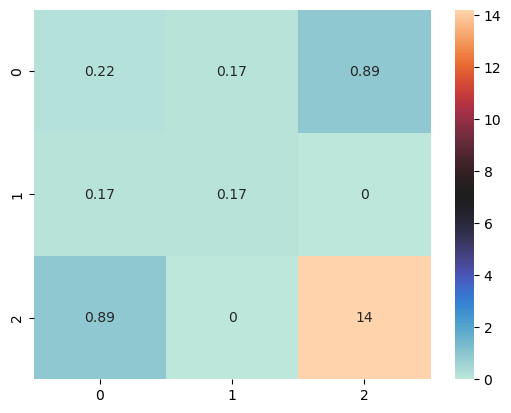

In [5]:
sns.heatmap(np.cov(A, rowvar=False, ddof=0), annot=True, cmap='icefire');

Теперь если добавить еще и масштабирование, получится **матрица корреляции**, по которой можно оценивать линейную зависимость переменных:

In [6]:
np.corrcoef(A, rowvar=False)

array([[1.       , 0.8660254, 0.5      ],
       [0.8660254, 1.       , 0.       ],
       [0.5      , 0.       , 1.       ]])

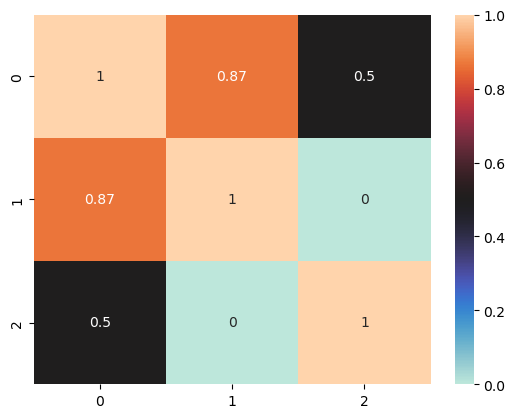

In [7]:
sns.heatmap(np.corrcoef(A, rowvar=False), annot=True, cmap='icefire');

### Дополнительно: матрица автокорреляции

Если проделать то же без центрирования по среднему, выйдет:

$$
R = \mathbb{E}[X_TX] = 
  \begin{bmatrix}
    \mathbb{E}[X_1^2] & \mathbb{E}[X_1X_2] & \cdots & \mathbb{E}[X_1X_N] \\
    \mathbb{E}[X_2X_1] & \mathbb{E}[X_2^2] & \cdots & \mathbb{E}[X_2X_N] \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathbb{E}[X_NX_1] & \cdots & \cdots & \mathbb{E}[X_N^2]
  \end{bmatrix}
$$

Если присмотреться, все это лишь запись дисперсии/ковариации в матричном виде, и аналогично $Var(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2$:

$$
\Sigma = R - \mathbb{E}[X]^T\mathbb{E}[X]
$$



In [8]:
A.T@A / A.shape[0]

array([[  2.        ,   3.5       ,  37.33333333],
       [  3.5       ,   6.41666667,  68.33333333],
       [ 37.33333333,  68.33333333, 761.33333333]])

---

## Случайные выборки и описательные статистики

**Генеральная совокупность (population)** - полный набор объектов, которые разделяют хотя бы одно общее свойство, интересное нам для анализа. 

**Выборка (sample)** - подмножество генеральной совокупности.

**Случайная выборка**: формально - набор независимых случайных переменных, распределенных так же, как генеральная совокупность.

Выборки из популярных распределений можно сгенерировать с помощью `np.random`:

In [9]:
x = np.random.poisson(1, 1001)
x[:20]

array([2, 0, 2, 1, 3, 1, 1, 1, 1, 0, 1, 1, 4, 2, 1, 2, 2, 3, 0, 1])

### Оценка параметров

На практике нам нередко приходится с задачей оценить реальное распределение по какой-то выборке. Для этого нужно:

- понять вид распределения;
- сделать правдоподобную оценку ключевых параметров (например, $\lambda$ дл Пуассона);
- знать минимальный размер выборки, достаточный для надежной оценки.

Таким образом, лучшие *выборочные статистики* должны быть хорошими оценками параметров генеральной совокупности.

#### Смещение оценки

Обозначим параметр как $\theta$, а нашу оценку соответственно как $\bar\theta$. **Смещением** будет называться среднее отклонение оценки от реального параметра.

$$
b(\bar\theta) = \mathbb{E}[\bar\theta] - \theta
$$

Несмещенные оценки не всегда очевидны и иногда требуют сложного доказательства несмещенности!

Оценки, пригодные к реальному использованию:

- могут быть несмещенными (годятся и для маленьких выборок);
- могут иметь смещение, стремящееся к 0 (годятся для больших выборок).

#### Эффективность и состоятельность оценки

Из двух несмещенных оценок более эффективна та, дисперсия которой меньше.

Это правило можно обобщить для смещенных оценок через **среднеквадратичную ошибку**: $MSE(\theta, \bar\theta) = \mathbb{E}[(\theta - \bar\theta)^2]$. Оценка с меньшей ошибкой более эффективна.

Кстасти, раскрыв скобки, мы получим:

$$
MSE(\theta, \bar\theta) = Var(\bar\theta) + 2b(\bar\theta)^2
$$

Для **состоятельной** оценки MSE с ростом выборки стремится к нулю.

### Выборочное среднее

In [10]:
x = np.random.poisson(1, 1001)
x[:20]

array([2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 3, 2, 0, 1, 1, 0, 1, 0, 3])

Среднее значение для генеральной совокупности соответствует среднему арифметическому всех значений. Это справедливо и для выборки.

$$
\bar x = \frac{1}{n}\sum_{i=1}^n x_i
$$

(Как правило, размер генеральной совокупности обозначают $N$, а выборки - $n$.)

**Это несмещенная оценка матожидания генеральной совокупности.**

In [11]:
np.mean(x)

1.0449550449550449

### Дисперсия и ковариация

**Выборочная дисперсия отличается от обычной**.

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^N (x_i - \bar x)^2
$$

**Это несмещенная оценка дисперсии генеральной совокупности.** Если бы мы использовали $n$, а не $n-1$, наша оценка была бы смещенной.

In [12]:
# Коррекция для выборочной дисперсии с помощьб параметра ddof:
np.var(x, ddof=1)

1.0649770229770228

**Стандартное отклонение** традиционно также считается для выборки по выборочной дисперсии, хотя *такая оценка уже смещенная*.

**Выборочная ковариация** двух выборок считается с той же поправкой:

$$
S_{X,Y} = \frac{1}{n-1} \sum_{i=1}^N (x_i - \bar x)(y_i - \bar y)
$$

### Медиана

С алгоритмом вычисления медианы мы уже знакомы.

In [13]:
sorted(x)[len(x) // 2]

1

In [14]:
np.median(x)

1.0

### Мода

Наиболее частое значение. Эта статистика подходит и для категориальных переменных. Мод может быть несколько.

In [15]:
st.mode(x, keepdims=False)

ModeResult(mode=0, count=367)

### Размах

Это просто разница между максимумом и минимумом:

In [16]:
np.ptp(x)

5

### Межквартильный размах

Мы уже знакомы с ним по диаграмме размаха.

In [17]:
st.iqr(x)

2.0

### Функция правдоподобия (likelyhood)

Чуть ранее мы рассматривали датасет как вектор случайных величин-столбцов. Теперь, когда мы ознакомились с понятием выборки, мы можем описать его более правильно:

Столбец представляет собой *выборку*: каждое наблюдение - возможное значение одной из $n$ одинаково распределенных величин (формально у каждого наблюдения есть своя случайная переменная, его порождающая, но они распределены одинаково).

Лучше всего, если такие наблюдения *независимы*, ведь тогда их совместную вероятность можно вычислять без интегрирования.

Когда датасет у нас на руках, наблюдения известны, а распределение - нет. Иными словами, для хорошей оценки параметров распределения мы хотели бы максимизировать некую функцию

$$
\mathcal{L}(\theta) = f_X(x;\theta)
$$

(здесь $\theta$ может обозначать не один параметр, а целый набор).

Упрощенно говоря, максимизировать (плотность) вероятности того, что каждая случайная величина, породившая наблюдение, примет значение из выборки при таком наборе параметров (запись в векторной форме: $X$ - набор случайных переменных, а $x$ - соответствующие наблюдения.

Вспоминаем свойство PDF независимых одинаково распределенных величин, и видим, что в этом случае:

$$
\mathcal{L}(\theta) = f_X(x;\theta) = \prod_{i=1}^n f_{X_n}(x_i)
$$


А еще лучше не перемножать, а складывать! Для этого воспользуемcя логарифмом:

$$
log \mathcal{L}(\theta) = log f_X(x;\theta) = \sum_{i=1}^n log f_{X_n}(x_i)
$$

In [18]:
x = np.random.normal(2, 4, 50)

In [19]:
theta = (0, 1)

In [20]:
np.product([st.norm(*theta).pdf(k) for k in x])

1.6780085445940396e-249

In [21]:
np.sum([np.log(st.norm(*theta).pdf(k)) for k in x])

-572.8260804553553

In [22]:
theta = (2, 5)

In [23]:
np.product([st.norm(*theta).pdf(k) for k in x])

3.168806035443123e-62

In [24]:
np.sum([np.log(st.norm(*theta).pdf(k)) for k in x])

-141.6069208936608

Точно так же можно сравнить правдоподобие разных распределений.

#### Максимизация правдоподобия

In [25]:
from scipy.optimize import minimize

In [26]:
def nll(theta, x):
    norm = st.norm(*theta)
    try:
        result = -np.sum([np.log(norm.pdf(k)) for k in x])
    except:
        result = np.inf
    return result

In [27]:
res = minimize(nll, (0,1), x, bounds=((None, None), (0.1, None)))
res

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 138.59067329069796
        x: [ 2.472e+00  3.869e+00]
      nit: 13
      jac: [ 0.000e+00 -5.684e-06]
     nfev: 42
     njev: 14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

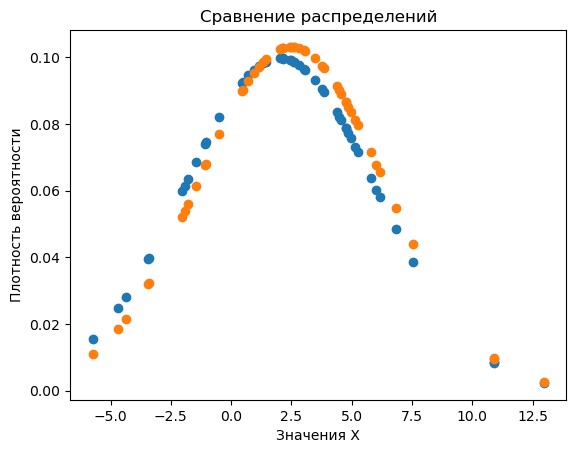

In [28]:
plt.title('Сравнение распределений')
plt.xlabel('Значения X')
plt.ylabel('Плотность вероятности')

n1 = st.norm(2, 4)
pdf1 = np.array([n1.pdf(k) for k in x])
plt.scatter(x, pdf1);
n2 = st.norm(*res.x)
pdf2 = np.array([n2.pdf(k) for k in x])
plt.scatter(x, pdf2);

In [29]:
x.mean()

2.4717668850206804

In [30]:
x.std()

3.8685313256997196

**Оценка, полученная методом максимального правдоподобия (MLE) всегда состоятельна.**

### Слабый закон больших чисел

$$
\lim_{n->\infty} \mathbb{P}\left[|\bar X - \mathbb{E}[X]| > \epsilon\right] = 0
$$

Иначе говоря, с ростом размера выборки вероятность того, что выборочное среднее отклонится от истинного больше, чем на любую наперед заданную положительную величину, стремится к нулю (но сохраняется), то есть дисперсия выборочного среднего падает. **Для этого второй момент случайной величины должен быть конечным.**

### Усиленный закон больших чисел

$$
\mathbb{P}\left[\lim_{n->\infty}\bar X = \mathbb{E}[X]\right] = 1
$$

Иными словами, выборочное среднее неизбежно стремится к реальному с увеличением размера выборки.
- **Для этого четвертый момент случайной величины должен быть конечным.**
- Закон лишь постулирует существование такого предела, но не называет какого-то конечного размера выборки.
- Мы должны проявлять осторожность в отношении подмножеств с мерой $\emptyset$.

### Центральная предельная теорема (классическая)

#### Формальное определение:

Пусть $\bar X$ - выборочное среднее по выборке с дисперсией $\sigma^2$ и матожиданием $\mu$, а величина $Z = \sqrt{n}\frac{\bar X - \mu}{\sigma}$. Тогда

$$
\lim_{n->\infty}F_Z(k) = \Phi(k)
$$

Иными словами, CDF выборочного среднего после нормализации (то есть у $Z$ среднее 0 и дисперсия 1) приближается с CDF стандартного нормального распределения. Как следствие, CDF любого выборочного среднего приближается к некой гауссиане, например, для $\bar X$ это $\mathcal{N}(\mu, \sigma^2/n)$.

Ограничения:
- это не обязательно означает схождение PDF;
- **третий момент Х должен быть конечным**;
- как следствие, распределения с большим третьим моментом (например, логнормальное) требуют значительно большей выборки для схождения.

Что это значит для нас?
- позволяет трактовать сумму разнородных случайных величин как нормальную величину;
- в некоторой окрестности среднего мы можем применять свойства нормального распределения для анализа.